## Implement logistic regression to classify binary data, demonstrate the effect of overfitting, and apply L1 and L2 regularisation techniques.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
X, y = make_classification(
    n_samples=300, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, random_state=42
)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

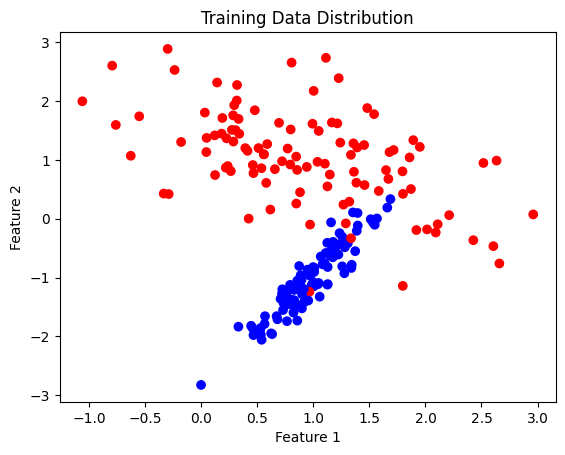

In [4]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.title("Training Data Distribution")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Model with no regularization

In [5]:
model_no_reg = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
model_no_reg.fit(X_train, y_train)

y_pred_no_reg = model_no_reg.predict(X_test)
acc_no_reg = accuracy_score(y_test, y_pred_no_reg)

Model with L1 regularization

In [6]:
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)
acc_l1 = accuracy_score(y_test, y_pred_l1)

Model with L2 regularization

In [7]:
model_l2 = LogisticRegression(penalty='l2', solver='lbfgs', C=0.1, max_iter=1000)
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
acc_l2 = accuracy_score(y_test, y_pred_l2)

In [8]:
print("Accuracy (No Regularization):", acc_no_reg)
print("Accuracy (L1 Regularization):", acc_l1)
print("Accuracy (L2 Regularization):", acc_l2)

Accuracy (No Regularization): 0.9444444444444444
Accuracy (L1 Regularization): 0.9555555555555556
Accuracy (L2 Regularization): 0.9555555555555556


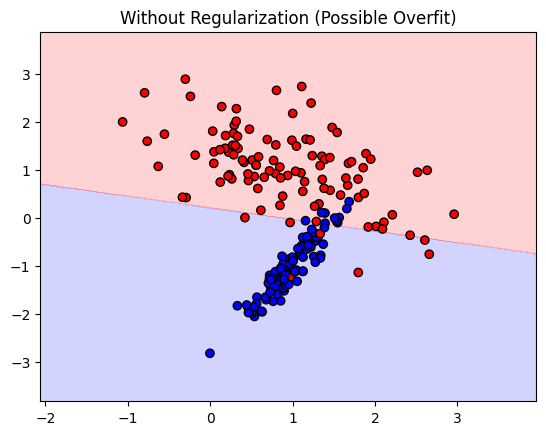

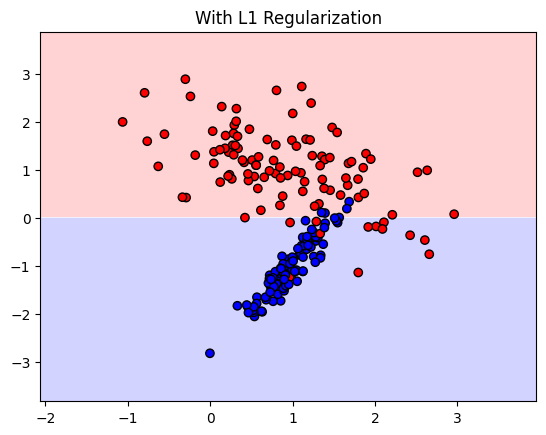

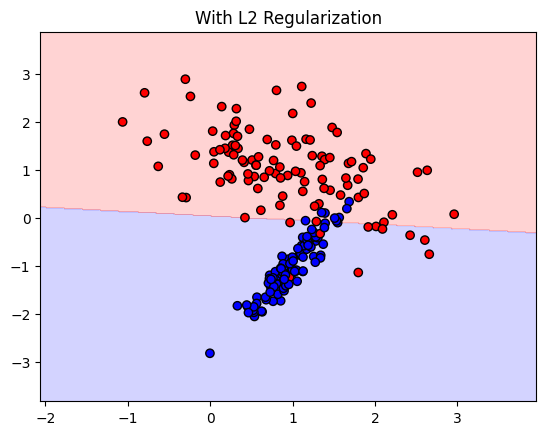

In [9]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.title(title)
    plt.show()

plot_decision_boundary(model_no_reg, X_train, y_train, "Without Regularization (Possible Overfit)")
plot_decision_boundary(model_l1, X_train, y_train, "With L1 Regularization")
plot_decision_boundary(model_l2, X_train, y_train, "With L2 Regularization")

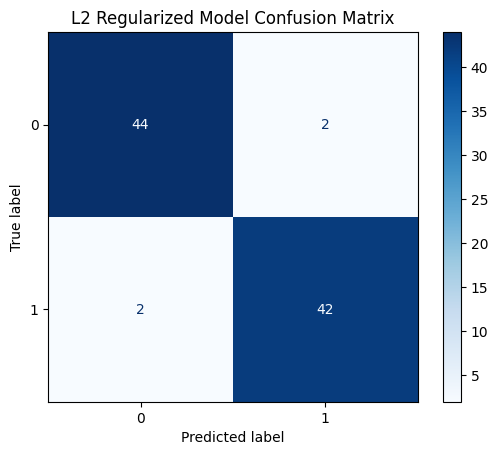

In [10]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_l2)).plot(cmap='Blues')
plt.title("L2 Regularized Model Confusion Matrix")
plt.show()